# 2.1 Instalación de las bibliotecas necesarias



In [15]:
import sns

'''pip install pandas matplotlib seaborn kagglehub
update pip'''


'pip install pandas matplotlib seaborn kagglehub\nupdate pip'

# 2.2 Descarga de la base de datos en formato .csv

In [16]:
import kagglehub
path = kagglehub.dataset_download("chitwanmanchanda/fraudulent-transactions-data")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\abelc\.cache\kagglehub\datasets\chitwanmanchanda\fraudulent-transactions-data\versions\1


In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/abelc/PycharmProjects/Ciencia De Datos/BD/Fraud.csv')

# 2.3 Carga y exploración inicial de los datos

In [4]:
import pandas as pd
df = pd.read_csv('C:/Users/abelc/PycharmProjects/Ciencia De Datos/BD/Fraud.csv')

# Muestra las primeras filas del DataFrame para verificar
print(df.head())
print(df.info)
print(df.describe)

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0     

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapa de calor de la correlación entre variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()


ValueError: could not convert string to float: 'PAYMENT'

<Figure size 1000x600 with 0 Axes>

In [7]:
# controlador de la cantidad de fraudes y transacciones no fraudulentas

cant_fraudes = df['isFraud'].sum()
print(f"Cantidad de transacciones fraudulentas: {cant_fraudes}" )

cant_no_fraudes = len(df) - cant_fraudes
print(f"Cantidad de transacciones no fraudulentas:{cant_no_fraudes}")

Cantidad de transacciones fraudulentas: 8213
Cantidad de transacciones no fraudulentas:6354407


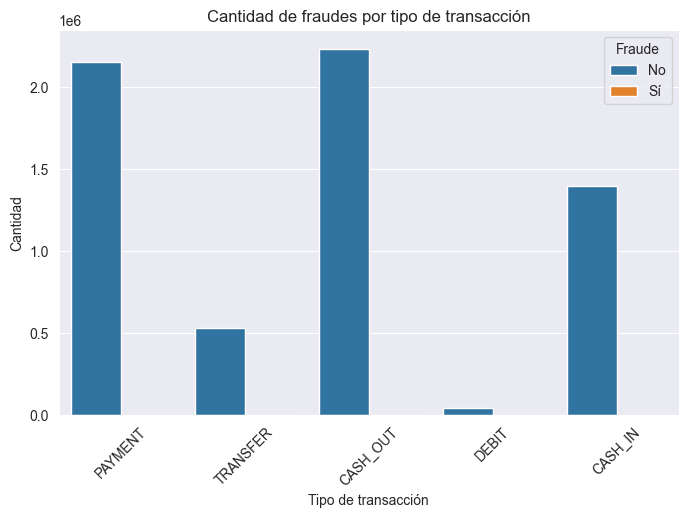

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="type", hue="isFraud")
plt.title("Cantidad de fraudes por tipo de transacción")
plt.xlabel("Tipo de transacción")
plt.ylabel("Cantidad")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.xticks(rotation=45)
plt.show()


# 2.4 Preparación de los datos
## 2.4.1 Eliminación de variables

In [8]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['step', 'nameOrig', 'nameDest']
# Eliminar las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

# Verificamos que las columnas se eliminaron
df.head()

#quedaron variables numericas y de tipo

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [14]:
# VALORES NULOS
df.isnull().sum()

# VALORES DUPLICADOS
# SUMA DE LOS DUPLICADOS QUE EXISTAN
num_duplicados = df.duplicated().sum()

# MOSTRARA CUANTOS DUPLICADOS
# DONDE SE GENERARON, \\
# Ver ejemplos de filas duplicadas
duplicados = df[df.duplicated()]
# Contar cuántos de los duplicados son fraudes y cuántos no
duplicados_fraude = duplicados['isFraud'].sum()
duplicados_no_fraude = len(duplicados) - duplicados_fraude
# Mostrar resultados
{
"Total de duplicados": num_duplicados,
"Duplicados que son fraude": duplicados_fraude,
"Duplicados que no son fraude": duplicados_no_fraude
}

{'Total de duplicados': np.int64(97880),
 'Duplicados que son fraude': np.int64(61),
 'Duplicados que no son fraude': np.int64(97819)}

In [15]:
# ELIMINAR DATOS QUE NO APORTAN VALOR, EN ESTE CASO SON 61 DATOS DUPLICADOS QUE NO AFECTARIAN

df = df.drop_duplicates()

In [16]:
# Podemos resetear los índices
df = df.reset_index(drop=True)

## 2.4.4 Tratamiento de valores atípicos

In [17]:
import numpy as np
# pruebas de hipotesis (hip. nula o ) encontrar estadisticamente significativa, si dos variables estan altamente correlacionadas


# Seleccionar las columnas numéricas
columnas_numericas = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Inicializar un diccionario para almacenar el conteo de valores atípicos
conteo_outliers = {}

# Iterar sobre cada columna numérica
for columna in columnas_numericas:
  # Calcular el primer y tercer cuartil (Q1 y Q3)
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)

  # Calcular el rango intercuartílico (IQR)
  IQR = Q3 - Q1

  # Definir los límites inferior y superior para los valores atípicos
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Contar los valores atípicos
  outliers = df[(df[columna] < limite_inferior) | \
  (df[columna] > limite_superior)]
  conteo_outliers[columna] = outliers.shape[0]


# Mostrar el conteo de valores atípicos por columna
for columna, conteo in conteo_outliers.items():
  print(f'Columna {columna}: {conteo} valores atípicos')
  total_outliers = sum(conteo_outliers.values())
  print(f"\nTotal de valores atípicos: {total_outliers}")
  print(f"El {total_outliers/len(df)}% de los valores son atípicos")

Columna amount: 331341 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos
Columna oldbalanceOrg: 1098406 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos
Columna newbalanceOrig: 1031683 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos
Columna oldbalanceDest: 767481 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos
Columna newbalanceDest: 720912 valores atípicos

Total de valores atípicos: 3949823
El 0.6304847447779157% de los valores son atípicos


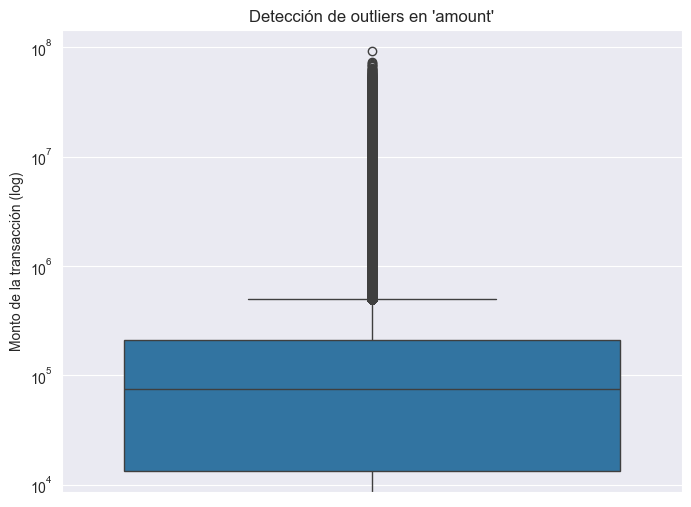

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="amount")
plt.yscale("log")  # Usamos escala logarítmica si hay valores extremos
plt.title("Detección de outliers en 'amount'")
plt.ylabel("Monto de la transacción (log)")
plt.show()


In [18]:
# Diccionarios para almacenar los resultados
proporcion_outliers_fraude = {}
proporcion_outliers_no_fraude = {}
# Iterar sobre cada columna numérica
for columna in columnas_numericas:
  # Calcular IQR y límites para valores atípicos
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  # Identificar valores atípicos
  outliers = (df[columna] < limite_inferior) | \
  (df[columna] > limite_superior)

  # Contar la proporción de valores atípicos en fraudes y no fraudes
  proporcion_outliers_fraude[columna] = df[outliers & \
  (df['isFraud'] == 1)].shape[0] / df[df['isFraud'] == 1].shape[0]
  proporcion_outliers_no_fraude[columna] = df[outliers & \
  (df['isFraud'] == 0)].shape[0] / df[df['isFraud'] == 0].shape[0]

# Crear DataFrame con los resultados
df_proporcion_outliers = pd.DataFrame({
'Proporción en fraudes': proporcion_outliers_fraude,
'Proporción en no fraudes': proporcion_outliers_no_fraude
})
df_proporcion_outliers

,Proporción en fraudes,Proporción en no fraudes
amount,0.463199,0.052355
oldbalanceOrg,0.594701,0.174785
newbalanceOrig,0.019014,0.164871
oldbalanceDest,0.054956,0.122596
newbalanceDest,0.126840,0.115059


# PRUEBA DE HIPOTESIS

In [19]:
import scipy.stats as stats
# Diccionario para almacenar los resultados de la prueba de Chi-cuadrado
chi2_results = {}
df_Hip = df.copy()
# Iterar sobre cada columna numérica
for columna in columnas_numericas:
  # Calcular IQR y límites para valores atípicos
  Q1 = df_Hip[columna].quantile(0.25)
  Q3 = df_Hip[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  # Crear una columna binaria indicando si es un valor atípico o no
  df_Hip[f"{columna}_outlier"] = (df_Hip[columna] < limite_inferior) | \
  (df_Hip[columna] > limite_superior)

  # Construir tabla de contingencia
  tabla_contingencia = pd.crosstab(df_Hip[f"{columna}_outlier"],

  df_Hip["isFraud"])

  # Prueba de Chi-cuadrado
  chi2_stat, p_valor, _, _ = stats.chi2_contingency(tabla_contingencia)
  # Guardar los resultados
  chi2_results[columna] = {'Chi2': chi2_stat, 'p-valor': p_valor}


# Convertir los resultados a DataFrame y mostrarlos
df_chi2_results = pd.DataFrame(chi2_results).T
df_chi2_results

# SI EL P-VALOR ES MENOR A 0.5 SE DESCARTA LA HIP. NULA. DE QUE NO HAY UNA RELACION ENTRE VALORES ATIPICOS Y QUE ES FRAUDE, PERO SI EXISTE RELACION CON ESOS DATOS. NO SE ELIMINAN, SE MANTIENEN, CREAR UNA NUEVA VARIABLE CON EL VALOR ATIPICO

,Chi2,p-valor
amount,27425.218630,0.000000e+00
oldbalanceOrg,9925.593149,0.000000e+00
newbalanceOrig,1258.031500,1.491697e-275
oldbalanceDest,345.869212,3.362733e-77
newbalanceDest,10.980585,9.207136e-04


## 2.4.5 Creación de nuevas variables

In [20]:
# Crear nuevas variables binarias indicando si cada transacción es un valor
# atípico en 'amount' y 'oldbalanceOrg'
df_outliers = df.copy()
# Definir los límites de valores atípicos usando el
# método del Rango Intercuartílico (IQR)
for columna in ['amount', 'oldbalanceOrg']:
  Q1 = df_outliers[columna].quantile(0.25)
  Q3 = df_outliers[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  # Crear una nueva columna indicando si el valor es atípico (1) o no (0)
  df_outliers[f'{columna}_outlier'] = ((df_outliers[columna] < limite_inferior) | (df_outliers[columna] > limite_superior)).astype(int)

# Verificar que las nuevas columnas fueron añadidas correctamente
df_outliers.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_outlier,oldbalanceOrg_outlier
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0


## 2.4.6 Codificación de Variables Categóricas

In [21]:
# CON OH, CREAR UNA ESCALADAS EN NUEVAS VARIABLES CATEGORICAS
# NO HAY CATEGORIAS NO HAY UNA QUE NECESITE UNA DE OTRA
df_OH = pd.get_dummies(df_outliers, columns=['type'])
df_OH[["type_CASH_IN", "type_CASH_OUT", "type_DEBIT",
"type_PAYMENT", "type_TRANSFER"]].head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False


## 2.4.7 Conversión de variables

In [22]:
df_OH.dtypes
# ELIGE TODAS LAS COLUMNAS DEL TIPO DE DATO QUE NOSOTROS DESEAMOS UTILIZAR, PARA DESPUES CAMBIARLOS Y PODER MANEJAR LOS DATOS, uint8 MANEJA NUMEROS POSITIVOS HACUENDO QUE SE REDUZCA EL NUMERO DE MEMORIA PARA CADA UNO DE LOS VALORES
columnas_booleanas = df_OH.select_dtypes(include=['bool']).columns
df_OH[columnas_booleanas] = df_OH[columnas_booleanas].astype(np.uint8)

## 2.4.8 División de los datos en entrenamiento y prueba

In [23]:
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df_OH.drop(columns=['isFraud'])
y = df_OH['isFraud']


# Dividir en conjunto de entrenamiento (90%) y prueba (10%)
# con estratificación: AYUDA A QUE LOS DATOS DE ENTRENAMIENTO SEAN VARIADOS SIN SOBRE ENTRENARSE, QUE LO HAGA EN PROPORCION DE LOS DATOS DE CADA CONJUNTO,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,)

In [24]:
# COMPROBACION DE LA ESTRATIFICACION


# Ver la relación entre fraudes y NO fraudes para el conjunto de prueba
cant_fraudes_test = sum(y_test)
cant_NO_fraudes_test = len(y_test)-sum(y_test)
proporcion_test = sum(y_test)/(len(y_test)-sum(y_test))
print(f"Cantidad de fraudes en el conjunto de prueba: \
{cant_fraudes_test}")
print(f"Cantidad de NO fraudes en el conjunto de prueba: \
{cant_NO_fraudes_test}")
print(f"Proporción (fraudes)/(NO fraudes) en el conjunto de prueba: \
{proporcion_test:.6f}")
# Ver la relación entre fraudes y NO fraudes para el
# conjunto de entrenamiento
cant_fraudes_train = sum(y_train)
cant_NO_fraudes_train = len(y_train)-sum(y_train)

# SUMA-CANTIDAD DE LA PROPORCION ENTRE FRAUDES Y NO FRAUDES EN EL CONJUNTO COMPLETO,
proporcion_train = sum(y_train)/(len(y_train)-sum(y_train))


print(f"Cantidad de fraudes en el conjunto de entrenamiento: \
{cant_fraudes_train}")
print(f"Cantidad de NO fraudes en el conjunto de entrenamiento: \
{cant_NO_fraudes_train}")
print(f"Proporción (fraudes)/(NO fraudes) en el conjunto de entrenamiento: \
{proporcion_train:.6f}")


#

Cantidad de fraudes en el conjunto de prueba: 820
Cantidad de NO fraudes en el conjunto de prueba: 625654
Proporción (fraudes)/(NO fraudes) en el conjunto de prueba: 0.001311
Cantidad de fraudes en el conjunto de entrenamiento: 7332
Cantidad de NO fraudes en el conjunto de entrenamiento: 5630934
Proporción (fraudes)/(NO fraudes) en el conjunto de entrenamiento: 0.001302


## 2.4.9 Estandarizar variables numéricas

In [25]:
from sklearn.preprocessing import StandardScaler
# Identificar columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['float64']).columns
columnas_categoricas = X_train.select_dtypes(exclude=['float64']).columns
# Ajustar el escalador solo en las columnas numéricas
# El scaler se ajusta sólo con el conjunto de entrenamiento
scaler = StandardScaler()
# Solo transformar numéricas
X_train_numericas = scaler.fit_transform(X_train[columnas_numericas])
# Aplicar el mismo escalado en prueba
X_test_numericas = scaler.transform(X_test[columnas_numericas])

#LA MEDIA Y LA ESTANDAR, DE LA ESTANDARIZACION: RESTA LA MEDIA Y LO DIVIDE ENTRE LA DESVIACION ESTANDAR. SE MUESTRA UN ARRAY

In [26]:
# Convertir de nuevo a DataFrame incluyendo las categóricas sin modificar
X_train_scaled = pd.DataFrame(X_train_numericas,

columns=columnas_numericas,
index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_numericas,

columns=columnas_numericas,
index=X_test.index)
# Añadir columnas categóricas de nuevo sin modificar
X_train_scaled[columnas_categoricas] = X_train[columnas_categoricas].values
X_test_scaled[columnas_categoricas] = X_test[columnas_categoricas].values

X_train_scaled

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,amount_outlier,oldbalanceOrg_outlier,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3926808,0.279670,-0.291233,-0.295008,-0.124506,0.025651,0,0,0,0,1,0,0,0
3729845,-0.001517,-0.277855,-0.295008,1.107552,1.039394,0,0,0,0,1,0,0,0
489883,-0.200479,-0.275216,-0.295008,-0.136019,-0.088694,0,0,0,0,1,0,0,0
415579,-0.121554,-0.291233,-0.295008,0.132224,0.117543,0,0,0,0,1,0,0,0
1653735,-0.282703,-0.185256,-0.193922,-0.326650,-0.336221,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277176,0.229985,0.971266,1.061333,0.389688,0.239287,0,0,1,1,0,0,0,0
2556291,0.039557,-0.291233,-0.295008,-0.181108,-0.145810,0,0,0,0,1,0,0,0
1468542,-0.250621,-0.291233,-0.295008,-0.326650,-0.336221,0,0,0,0,0,0,1,0
3088165,-0.290763,-0.266822,-0.272822,-0.326650,-0.336221,0,0,0,0,0,0,1,0


## 2.4.10 Balanceo de clases

In [14]:
from imblearn.over_sampling import SMOTE
# Aplicar SMOTE en el conjunto de entrenamiento
# (sin afectar el conjunto de prueba)
smote = SMOTE(sampling_strategy=0.3, random_state=42) # Genera más de fraudes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Verificar la nueva distribución de clases después de SMOTE
print("Distribución de clases después de SMOTE en entrenamiento:")
print(y_train_resampled.value_counts())

# Ver la relación entre fraudes y NO fraudes para el conjunto de pruebA
cant_fraudes_test = y_train_resampled.value_counts()[1]
cant_NO_fraudes_test = y_train_resampled.value_counts()[0]
proporcion_test = sum(y_test)/(len(y_test)-sum(y_test))
print(f"Cantidad de fraudes en el conjunto de prueba: \
{cant_fraudes_test}")
print(f"Cantidad de NO fraudes en el conjunto de prueba: \
{cant_NO_fraudes_test}")
print(f"Proporción (fraudes)/(NO fraudes) después de usar SMOTE: \
{cant_fraudes_test/cant_NO_fraudes_test:.4f}")

# PASA MINORISTA QUE TENGA EL 30% DE LOS DATOS DE L MAYORIA PARA TENER UN EQUILIBRIO
# AUMENTA LA CANTIDAD DE DATOS EN FRAUDE PARA COMPENSAR UN BALANCEO
# ANADIR MAS PESO A UNA VARIABLE QUE A OTRAS

# INDICA LA CANTIDAD MINIMA A LA CANTIDAD MAYORITARIA
# INDICA QUE LA PROPORCION DEL MODELO DE LA FUNCION SMOKE QUE HIZO BIEN

NameError: name 'X_train' is not defined

In [28]:
# vamos a visualizar el conjunto final:
X_train_resampled

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,amount_outlier,oldbalanceOrg_outlier,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,3.524855e+05,0.000000e+00,0.00,6.920457e+05,1.339397e+06,0,0,0,0,1,0,0,0
1,1.815301e+05,3.893800e+04,0.00,4.910031e+06,5.091561e+06,0,0,0,0,1,0,0,0
2,6.056599e+04,4.661871e+04,0.00,6.526285e+05,9.161714e+05,0,0,0,0,1,0,0,0
3,1.085508e+05,0.000000e+00,0.00,1.570967e+06,1.679518e+06,0,0,0,0,1,0,0,0
4,1.057601e+04,3.084578e+05,297881.81,0.000000e+00,0.000000e+00,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320209,6.670568e+05,6.670568e+05,0.00,0.000000e+00,0.000000e+00,0,1,1,0,0,0,0,1
7320210,1.057549e+05,1.057549e+05,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,1
7320211,1.116930e+06,1.116930e+06,0.00,1.756113e+05,1.292541e+06,0,1,1,0,1,0,0,0
7320212,4.716325e+06,4.716325e+06,0.00,0.000000e+00,4.716325e+06,0,1,1,0,1,0,0,0
